<a href="https://colab.research.google.com/github/Marshmellowon/Mnist_GAN/blob/master/GAN_LSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [24]:
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

In [25]:
x_train.min(), x_train.max()

(-1.0, 1.0)

In [26]:
x_train = x_train.reshape(-1, 784)
x_train.shape

(60000, 784)

In [27]:
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Conv2D, Input, BatchNormalization, Conv2DTranspose, Reshape, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt

In [28]:
noise_dim =100

adam = Adam(learning_rate=0.002, beta_1=0.5)

In [29]:
generator = Sequential([
                        Dense(256, input_dim=noise_dim),
                        BatchNormalization(),
                        LeakyReLU(0.2),
                        Dense(512),
                        BatchNormalization(),
                        LeakyReLU(0.2),
                        Dense(1024),
                        BatchNormalization(),
                        LeakyReLU(0.2),
                        Dense(28*28, activation='tanh')
])

In [30]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               25856     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)             

In [31]:
discriminator = Sequential([
                            Dense(1024, input_shape=(784,), kernel_initializer=RandomNormal(stddev=0.02)),
                            LeakyReLU(0.2),
                            Dropout(0.3),
                            Dense(512),
                            LeakyReLU(0.2),
                            Dropout(0.3),
                            Dense(256),
                            LeakyReLU(0.2),
                            Dropout(0.3),
                            Dense(1, activation='sigmoid')
])

In [32]:
discriminator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [33]:
# discriminator compile
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [34]:
# generator만 학습한다.
discriminator.trainable = False
gan_input = Input(shape=(noise_dim,))
x = generator(inputs=gan_input)
output = discriminator(x)

In [35]:
gan = Model(gan_input, output)

In [36]:
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               1493520   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 1460225   
Total params: 2,953,745
Trainable params: 1,489,936
Non-trainable params: 1,463,809
_________________________________________________________________


In [37]:
gan.compile(loss='binary_crossentropy', optimizer=adam)

In [38]:
def get_batches(data, batch_size):
    batches = []
    for i in range(int(data.shape[0]) // batch_size):
        batch = data[i*batch_size: (i+1)*batch_size]
        batches.append(batch)
    return np.array(batches)

In [39]:
def visualize_training(epoch, d_losses, g_losses):
    # 오차에 대한 시각화
    plt.figure(figsize=(8, 4))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generatror Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print('epoch: {}, Discriminator Loss: {}, Generator Loss: {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))
    
    #샘플 데이터 생성 후 시각화
    noise = np.random.normal(0, 1, size=(24, noise_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(-1, 28, 28)
    
    plt.figure(figsize=(8, 4))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 6, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

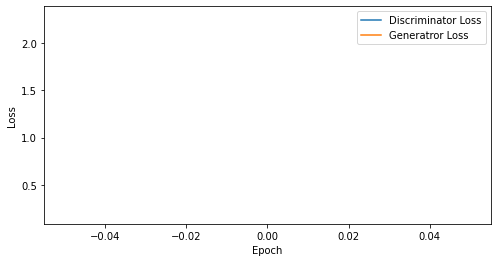

epoch: 1, Discriminator Loss: 0.19551560282707214, Generator Loss: 2.278355121612549


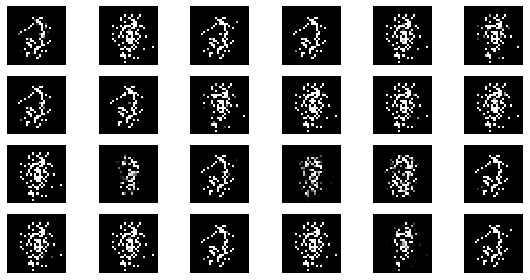

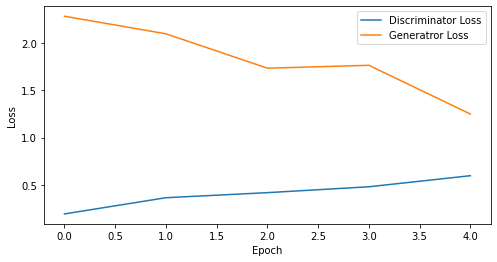

epoch: 5, Discriminator Loss: 0.41216686367988586, Generator Loss: 1.8224740505218506


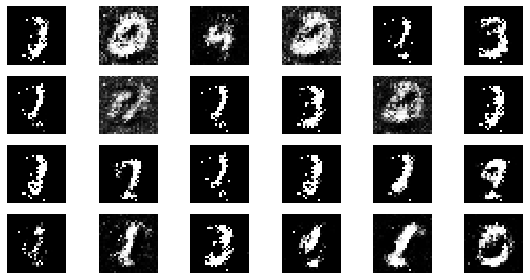

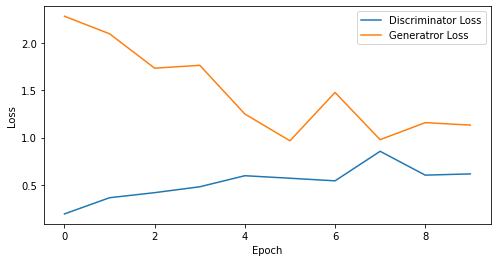

epoch: 10, Discriminator Loss: 0.5253049999475479, Generator Loss: 1.4820318937301635


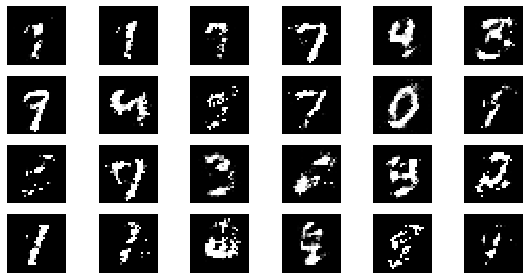

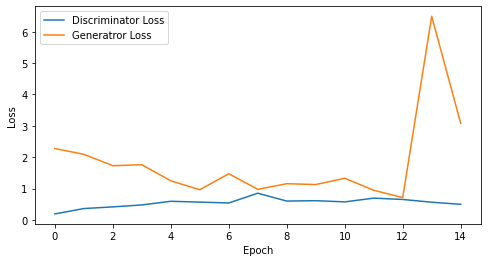

epoch: 15, Discriminator Loss: 0.550332659482956, Generator Loss: 1.8258885343869526


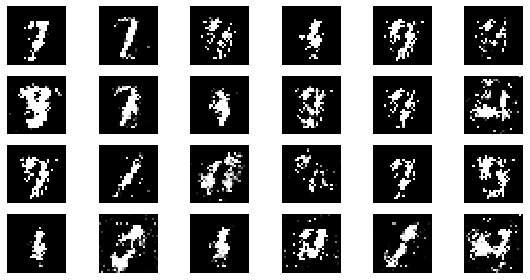

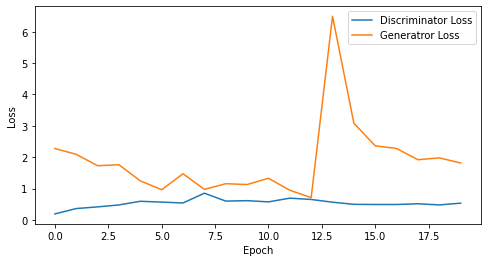

epoch: 20, Discriminator Loss: 0.5392800569534302, Generator Loss: 1.887558528780937


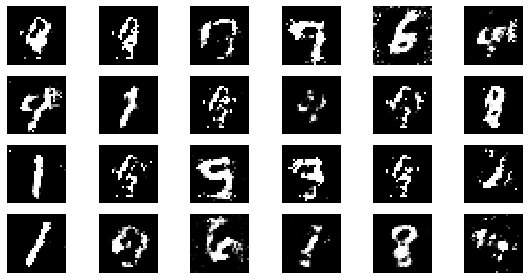

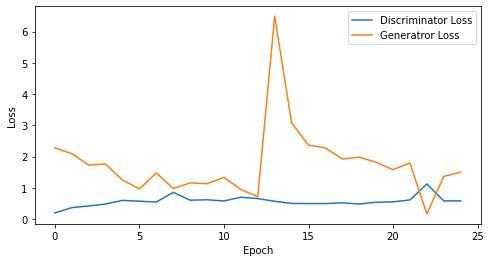

epoch: 25, Discriminator Loss: 0.5693817710876465, Generator Loss: 1.766222112774849


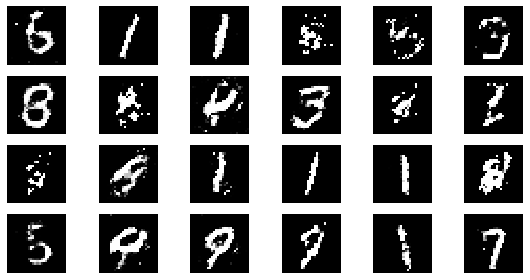

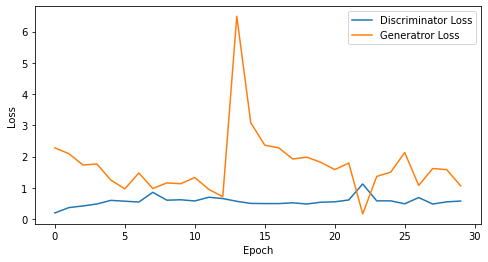

epoch: 30, Discriminator Loss: 0.5673168768485387, Generator Loss: 1.7207623228430748


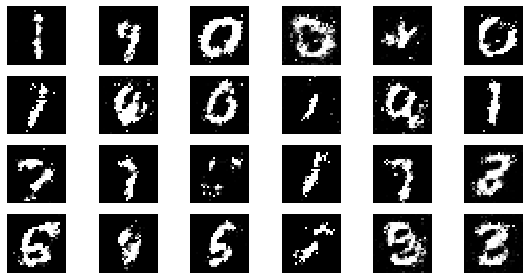

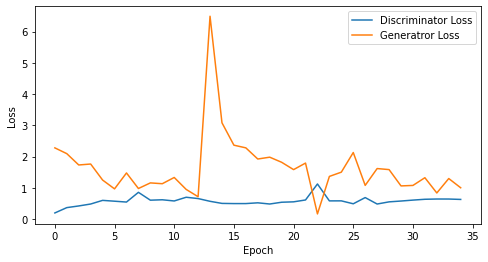

epoch: 35, Discriminator Loss: 0.5762816744191306, Generator Loss: 1.6330276033708027


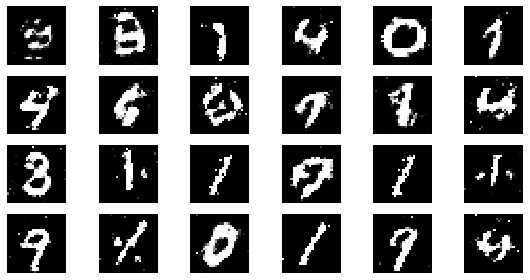

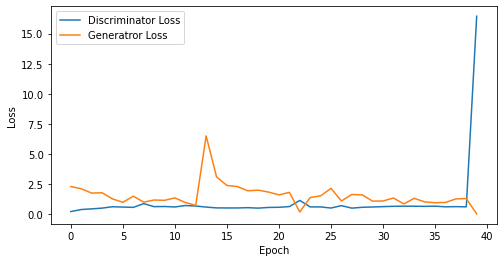

epoch: 40, Discriminator Loss: 0.9761510856449604, Generator Loss: 1.5391701508313418


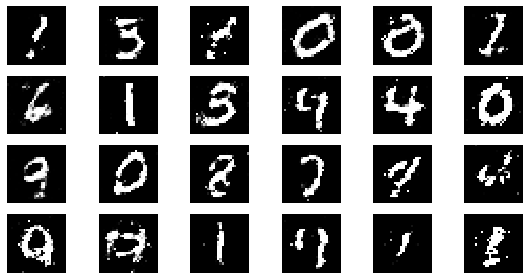

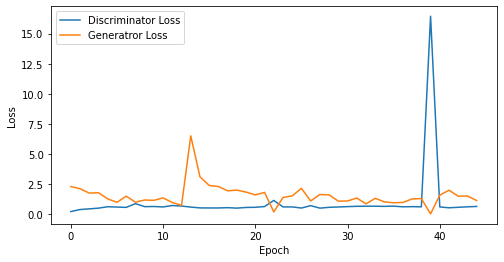

epoch: 45, Discriminator Loss: 0.9311421308252547, Generator Loss: 1.5372962252961264


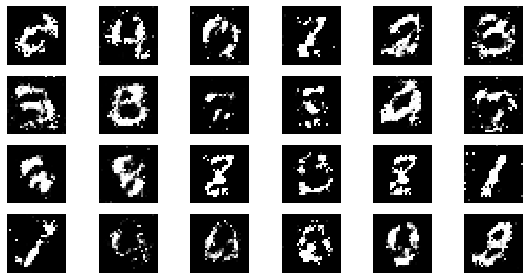

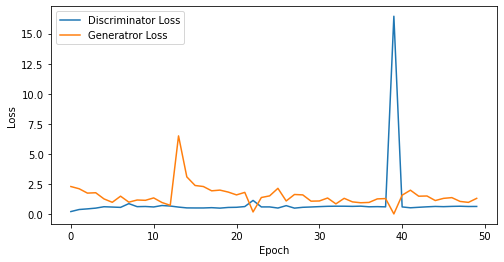

epoch: 50, Discriminator Loss: 0.9001882296800613, Generator Loss: 1.5024181333184243


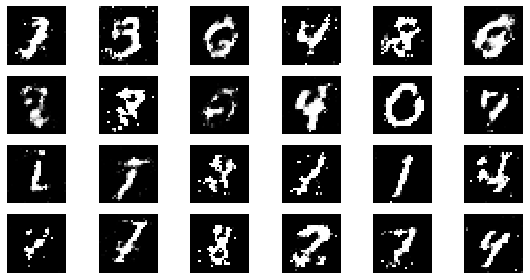

In [40]:
# train
BATCH_SIZE = 128
EPOCHS = 50

generator_loss = []
discriminator_loss = []

for epoch in range(1, EPOCHS + 1):
    for real in get_batches(x_train, BATCH_SIZE):
        input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, noise_dim])

        # generator
        generated_img = generator.predict(input_noise)

        x_dis = np.concatenate([real, generated_img])

        y_dis = np.zeros(2 * BATCH_SIZE)
        y_dis[:BATCH_SIZE] = 0.9

        # discriminator
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x_dis, y_dis)

        # train gan
        noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, noise_dim])
        y_gan = np.ones(BATCH_SIZE)

        # discrimomator 판별 학습 방지
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gan)

    discriminator_loss.append(d_loss)
    generator_loss.append(g_loss)

    if epoch == 1 or epoch % 5 == 0:
        visualize_training(epoch, discriminator_loss, generator_loss)